In [1]:
import pandas as pd

In [2]:
demo = pd.read_csv('df_final_demo.txt')
demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [3]:
demo_duplicates = demo.duplicated()
demo_duplicates.sum()

0

In [4]:
print(demo.isnull().sum())

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64


In [5]:
print(demo.columns)

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')


In [6]:
demo = demo.rename(columns={'clnt_tenure_yr': 'tenure_year', 'clnt_tenure_mnth': 'tenure_month', 'clnt_age':'client_age', 'gendr':'gender','bal':'total_balance'})
demo

,client_id,tenure_year,tenure_month,client_age,gender,num_accts,total_balance,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [7]:
demo['gender'].unique()

# make a dict

array(['U', 'M', 'F', nan, 'X'], dtype=object)

In [8]:
demo['gender'] = demo['gender'].replace(['X', 'U', 'nan'], 'unknown')
demo['gender'] = demo['gender'].fillna('unknown')

# Display the cleaned DataFrame
print("\nDataFrame after cleaning 'gender' column:")
print(demo)



DataFrame after cleaning 'gender' column:
       client_id  tenure_year  tenure_month  client_age   gender  num_accts  \
0         836976          6.0          73.0        60.5  unknown        2.0   
1        2304905          7.0          94.0        58.0  unknown        2.0   
2        1439522          5.0          64.0        32.0  unknown        2.0   
3        1562045         16.0         198.0        49.0        M        2.0   
4        5126305         12.0         145.0        33.0        F        2.0   
...          ...          ...           ...         ...      ...        ...   
70604    7993686          4.0          56.0        38.5  unknown        3.0   
70605    8981690         12.0         148.0        31.0        M        2.0   
70606     333913         16.0         198.0        61.5        F        2.0   
70607    1573142         21.0         255.0        68.0        M        3.0   
70608    5602139         21.0         254.0        59.5        F        3.0   

       t

In [9]:
gender_counts = demo['gender'].value_counts()

# Get counts for 'F' and 'M'
count_f = gender_counts.get('F', 0)
count_m = gender_counts.get('M', 0)

# Display the counts
print(f"\nCount of 'F' in 'gender' column: {count_f}")
print(f"Count of 'M' in 'gender' column: {count_m}")


Count of 'F' in 'gender' column: 22746
Count of 'M' in 'gender' column: 23724


In [10]:
gender_counts = demo['gender'].value_counts()
count_unknown = gender_counts.get('unknown', 0)

# Alternatively, count using boolean indexing
count_unknown_alternative = (demo['gender'] == 'unknown').sum()

# Display the counts
print(f"\nCount of 'unknown' in 'gender' column: {count_unknown}")


Count of 'unknown' in 'gender' column: 24139


In [11]:
demo['client_age'] = demo['client_age'].round(0).fillna(-1).astype(int)

# Display the DataFrame after rounding
print("\nDataFrame after rounding 'client_age':")
print(demo[['client_age']].head())


DataFrame after rounding 'client_age':
   client_age
0          60
1          58
2          32
3          49
4          33


In [12]:
# Fill NaN values before converting to int
cols_to_clean = ['tenure_year', 'tenure_month', 'calls_6_mnth', 'logons_6_mnth', 'num_accts', 'total_balance']
demo[cols_to_clean] = demo[cols_to_clean].round(0).fillna(-1).astype(int)

print("\nDataFrame after cleaning 'tenure_year', 'tenure_month', 'calls_6_mnth', 'logons_6_mnth', 'num_accts', 'total_balance' :")
print(demo)


DataFrame after cleaning 'tenure_year', 'tenure_month', 'calls_6_mnth', 'logons_6_mnth', 'num_accts', 'total_balance' :
       client_id  tenure_year  tenure_month  client_age   gender  num_accts  \
0         836976            6            73          60  unknown          2   
1        2304905            7            94          58  unknown          2   
2        1439522            5            64          32  unknown          2   
3        1562045           16           198          49        M          2   
4        5126305           12           145          33        F          2   
...          ...          ...           ...         ...      ...        ...   
70604    7993686            4            56          38  unknown          3   
70605    8981690           12           148          31        M          2   
70606     333913           16           198          62        F          2   
70607    1573142           21           255          68        M          3   
70608    5

In [13]:
demo.nunique()

client_id        70609
tenure_year         55
tenure_month       483
client_age          83
gender               3
num_accts            9
total_balance    56924
calls_6_mnth         9
logons_6_mnth       10
dtype: int64

In [14]:
demo.head()

,client_id,tenure_year,tenure_month,client_age,gender,num_accts,total_balance,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,unknown,2,45105,6,9
1,2304905,7,94,58,unknown,2,110860,6,9
2,1439522,5,64,32,unknown,2,52468,6,9
3,1562045,16,198,49,M,2,67455,3,6
4,5126305,12,145,33,F,2,103672,0,3


In [23]:
demo["gender"].value_counts()

gender
unknown    24139
M          23724
F          22746
Name: count, dtype: int64

In [30]:
demo['tenure_year'].value_counts().sort_values(ascending=True)

tenure_year
 62       1
 54       1
 45       1
 41       1
 52       2
 44       3
 49       4
 51       5
 46       5
 43       6
 47       6
 42       6
 50       8
 39       9
 55       9
 40       9
-1       14
 48      16
 38      33
 37      35
 36      36
 2       81
 35     102
 31     166
 34     175
 32     191
 33     206
 30     303
 29     309
 3      449
 25     484
 28     507
 27     632
 26     660
 24     846
 19    1153
 18    1206
 23    1279
 17    1373
 22    1492
 20    1580
 21    2257
 16    2714
 10    2775
 11    2920
 9     3357
 13    3607
 12    3631
 14    3646
 8     4045
 15    4564
 4     4687
 7     4955
 5     6955
 6     7092
Name: count, dtype: int64

In [31]:
mean_tnr_year = demo["tenure_year"].mean()
mean_tnr_year

12.05036185188857

In [32]:
median_tnr_year = demo["tenure_year"].median()
median_tnr_year

11.0

In [38]:
# Create a longevity metric:

demo['tenure_total_months'] = demo['tenure_year'] * 12 + demo['tenure_month']
demo.head()


,client_id,tenure_year,tenure_month,client_age,gender,num_accts,total_balance,calls_6_mnth,logons_6_mnth,tenure_total_months
0,836976,6,73,60,unknown,2,45105,6,9,145
1,2304905,7,94,58,unknown,2,110860,6,9,178
2,1439522,5,64,32,unknown,2,52468,6,9,124
3,1562045,16,198,49,M,2,67455,3,6,390
4,5126305,12,145,33,F,2,103672,0,3,289


In [39]:
# Simple analysis: correlation between age vs longevity

demo[['client_age', 'tenure_total_months']].corr()


,client_age,tenure_total_months
client_age,1.000000,0.310211
tenure_total_months,0.310211,1.000000


In [60]:
df_clean = demo[demo['tenure_total_months'] >= 0].copy()



In [61]:
print(df_clean['tenure_total_months'].describe())

count    70595.000000
mean       295.294766
std        164.507881
min         57.000000
25%        154.000000
50%        268.000000
75%        384.000000
max       1493.000000
Name: tenure_total_months, dtype: float64


In [62]:
df_clean.head()

,client_id,tenure_year,tenure_month,client_age,gender,num_accts,total_balance,calls_6_mnth,logons_6_mnth,tenure_total_months,tenure_group,age_group
0,836976,6,73,60,unknown,2,45105,6,9,145,long-standing,older
1,2304905,7,94,58,unknown,2,110860,6,9,178,long-standing,older
2,1439522,5,64,32,unknown,2,52468,6,9,124,long-standing,middle-aged
3,1562045,16,198,49,M,2,67455,3,6,390,long-standing,middle-aged
4,5126305,12,145,33,F,2,103672,0,3,289,long-standing,middle-aged


In [69]:
# classify clients as new or ancient, young or old

df_clean['tenure_group'] = pd.cut(df_clean['tenure_total_months'], bins=[0, 150, 300, float('inf')], labels=['new', 'mid-term', 'long-standing'],  include_lowest=True)
df_clean['age_group'] = pd.cut(df_clean['client_age'], bins=[0, 30, 50, 100], labels=['young', 'mature', 'senior'])

df_clean.head()


,client_id,tenure_year,tenure_month,client_age,gender,num_accts,total_balance,calls_6_mnth,logons_6_mnth,tenure_total_months,tenure_group,age_group
0,836976,6,73,60,unknown,2,45105,6,9,145,new,senior
1,2304905,7,94,58,unknown,2,110860,6,9,178,mid-term,senior
2,1439522,5,64,32,unknown,2,52468,6,9,124,new,mature
3,1562045,16,198,49,M,2,67455,3,6,390,long-standing,mature
4,5126305,12,145,33,F,2,103672,0,3,289,mid-term,mature


In [80]:
heatmap_data = df_clean.groupby(['age_group', 'tenure_group']).size().unstack()
heatmap_data

#heatmap_pct = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)
#heatmap_pct

C:\Users\sofia\AppData\Local\Temp\ipykernel_24528\3135440382.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df_clean.groupby(['age_group', 'tenure_group']).size().unstack()


tenure_group,new,mid-term,long-standing
age_group,,,
young,6122,5913,2809
mature,5040,9536,10902
senior,5026,9309,15937


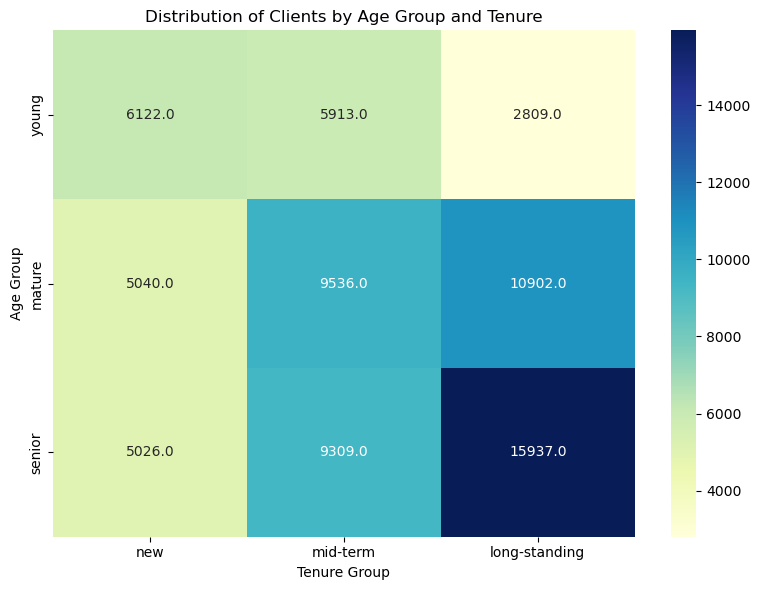

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Distribution of Clients by Age Group and Tenure')
plt.ylabel('Age Group')
plt.xlabel('Tenure Group')
plt.tight_layout()
plt.show()

In [44]:
print(demo['tenure_total_months'].describe())


count    70609.000000
mean       295.233639
std        164.548834
min        -13.000000
25%        154.000000
50%        268.000000
75%        384.000000
max       1493.000000
Name: tenure_total_months, dtype: float64


In [36]:
exp_clients = pd.read_csv('df_final_experiment_clients.txt')
exp_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [16]:
exp_clients.columns = [col.lower() for col in exp_clients.columns]
print(exp_clients.columns)

Index(['client_id', 'variation'], dtype='object')


In [17]:
exp_clients['variation'] = exp_clients['variation'].fillna('unknown')

# Display the DataFrame after cleaning
print("\nDataFrame after replacing NaN values in 'variation':")
print(exp_clients)


DataFrame after replacing NaN values in 'variation':
       client_id variation
0        9988021      Test
1        8320017      Test
2        4033851   Control
3        1982004      Test
4        9294070   Control
...          ...       ...
70604    2443347   unknown
70605    8788427   unknown
70606     266828   unknown
70607    1266421   unknown
70608    9895983   unknown

[70609 rows x 2 columns]


In [18]:
variation_counts = exp_clients['variation'].value_counts()

# Display the counts of unique values
print("\nCounts of unique values in 'variation' column:")
print(variation_counts)


Counts of unique values in 'variation' column:
variation
Test       26968
Control    23532
unknown    20109
Name: count, dtype: int64


In [19]:
exp_clients_duplicates = exp_clients.duplicated()
exp_clients_duplicates.sum()

0

In [20]:
print(exp_clients.isnull().sum())

client_id    0
variation    0
dtype: int64


In [21]:
exp_clients['variation'].unique()

array(['Test', 'Control', 'unknown'], dtype=object)

In [22]:
exp_clients.nunique()

client_id    70609
variation        3
dtype: int64